In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load medical dataset
medical= pd.read_csv('medical_clean.csv')

In [2]:
# Get overview of loaded data
medical.info

<bound method DataFrame.info of       CaseOrder Customer_id                           Interaction  \
0             1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1             2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2             3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3             4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4             5     C544523  5885f56b-d6da-43a3-8760-83583af94266   
...         ...         ...                                   ...   
9995       9996     B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9996       9997     P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9997       9998     R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9998       9999     E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
9999      10000     I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   

                                   UID          City State        County  \
0     3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL     

In [3]:
# Check for duplicates in the dataset
print("Duplicates?:")
print(medical.duplicated().value_counts())

Duplicates?:
False    10000
Name: count, dtype: int64


In [4]:
# Identify missing values in each column
missing_values = medical.isnull().sum()
print("\nMissing Values in Medical dataset Each Column:")
print(missing_values)


Missing Values in Medical dataset Each Column:
CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days    

In [6]:
# Summary statistics
medical.describe(include='all').round(2)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00,10000,10000,10000,10000,10000,10000,10000.00,10000.00,10000.00,...,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
unique,NaN,10000,10000,10000,6072,52,1607,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Houston,TX,Jefferson,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,1,36,553,118,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50,NaN,NaN,NaN,NaN,NaN,NaN,50159.32,38.75,-91.24,...,5312.17,12934.53,3.52,3.51,3.51,3.52,3.50,3.52,3.49,3.51
std,2886.90,NaN,NaN,NaN,NaN,NaN,NaN,27469.59,5.40,15.21,...,2180.39,6542.60,1.03,1.03,1.03,1.04,1.03,1.03,1.02,1.04
min,1.00,NaN,NaN,NaN,NaN,NaN,NaN,610.00,17.97,-174.21,...,1938.31,3125.70,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2500.75,NaN,NaN,NaN,NaN,NaN,NaN,27592.00,35.26,-97.35,...,3179.37,7986.49,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
50%,5000.50,NaN,NaN,NaN,NaN,NaN,NaN,50207.00,39.42,-88.40,...,5213.95,11573.98,4.00,3.00,4.00,4.00,3.00,4.00,3.00,3.00
75%,7500.25,NaN,NaN,NaN,NaN,NaN,NaN,72411.75,42.04,-80.44,...,7459.70,15626.49,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00


In [7]:
# Define a function to count outliers using IQR
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.sum()

# Select numeric columns for outlier detection
numeric_columns = medical.select_dtypes(include=['float64', 'int64'])

# Count outliers for each numeric column
count_outliers = numeric_columns.apply(count_outliers)

# Display the count of outliers
print(count_outliers)

CaseOrder               0
Zip                     0
Lat                   150
Lng                   237
Population            855
Children              411
Age                     0
Income                326
VitD_levels            60
Doc_visits              0
Full_meals_eaten        8
vitD_supp              70
Initial_days            0
TotalCharge             0
Additional_charges    424
Item1                 449
Item2                 429
Item3                 443
Item4                 450
Item5                 443
Item6                 443
Item7                 438
Item8                 442
dtype: int64


In [8]:
# Drop Unused Features
medical = medical[['Age', 'Income', 'VitD_levels','TotalCharge']]

In [9]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(medical)
scaled_medical = pd.DataFrame(scaled_data, columns = medical.columns)

# Ensure scaling worked and std close to 1
scaled_medical.std()

Age            1.00005
Income         1.00005
VitD_levels    1.00005
TotalCharge    1.00005
dtype: float64

In [10]:
# Export new dataset
scaled_medical.to_csv('kmeans_medical.csv', index=False)

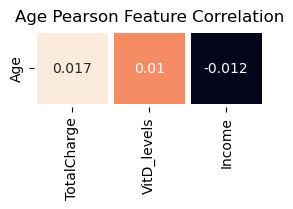

In [11]:
# Check Feature Correlation of Variable to Age
# Compute correlation matrix
cor_matrix = scaled_medical.corr().round(3)

# Extract the 'Age' row
cor_age = cor_matrix.loc[['Age']]

# Drop the 'Age' column from the correlation row
cor_age.drop(columns=['Age'], inplace=True)

# Transpose for sorting
cor_age = cor_age.T

# Sort the values by the correlation with 'Age'
cor_age.sort_values(by='Age', axis=0, ascending=False, inplace=True)

# Plot heatmap
plt.figure(figsize=(12, 1))
sns.heatmap(cor_age.T, annot=True, square=True, linewidths=3, cbar=False)
plt.title('Age Pearson Feature Correlation')
plt.show()

In [12]:
# Create a new DataFrame with selected features
cluster_medical = scaled_medical[['Age', 'TotalCharge']]

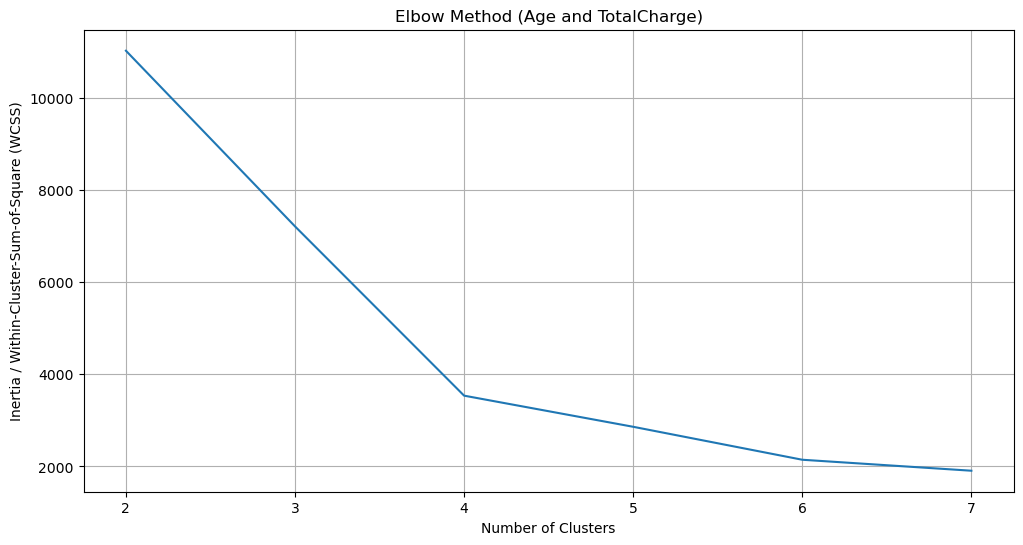

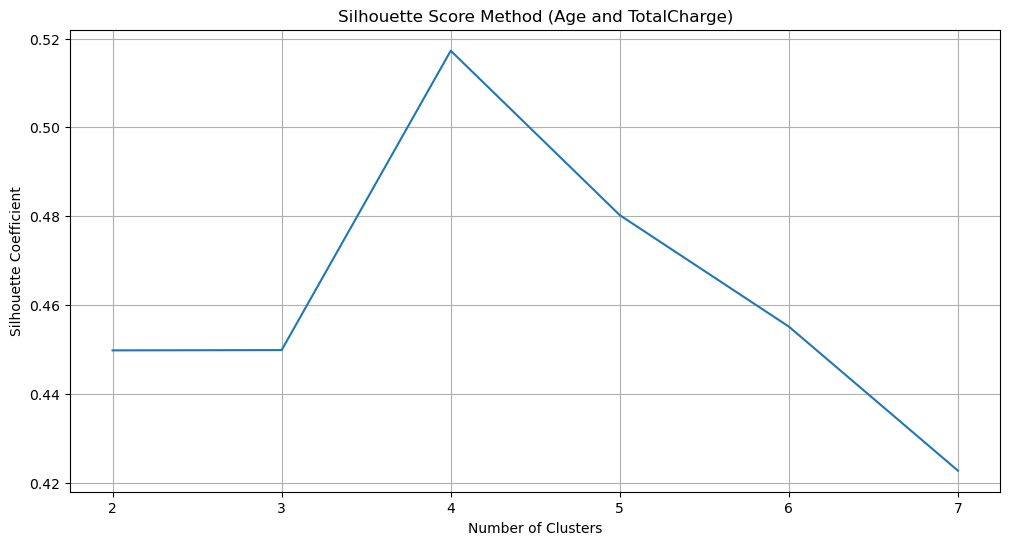

In [13]:
# Define K Range
k_range = range(2, 8)

# Initialize Lists for Scores
inertia = []
silhouette_coeff = []

for k in k_range:
    # Initialize Model with k-clusters
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init='auto',
    )
    
    kmeans.fit(cluster_medical)
    
    # Append Inertia Value
    inertia.append(kmeans.inertia_)
    
    # Evaluate and Append Silhouette Score
    score = silhouette_score(
        cluster_medical,
        kmeans.labels_
    )
    silhouette_coeff.append(score)

# Plot Inertia / Elbow Method
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(k_range, inertia)
plt.title(f"Elbow Method (Age and TotalCharge)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia / Within-Cluster-Sum-of-Square (WCSS)")
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(k_range, silhouette_coeff)
plt.title(f"Silhouette Score Method (Age and TotalCharge)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [14]:
# Fit and Predict clusters using KMeans
km = KMeans(n_clusters=4, n_init='auto', random_state=42)
km.fit(cluster_medical)
y_pred = km.predict(cluster_medical)

# Create a copy of the DataFrame to avoid warnings
cluster_medical_copy = cluster_medical.copy()

# Append cluster labels to the copy of the DataFrame
cluster_medical_copy['Clusters'] = y_pred
# Get the mean of the clusters
cluster_medical_copy.groupby('Clusters').agg({
    'Age': 'mean',
    'TotalCharge': 'mean'}).round(2)

,Age,TotalCharge
Clusters,,
0,-0.90,-0.95
1,-0.83,0.95
2,0.83,-0.94
3,0.90,0.95


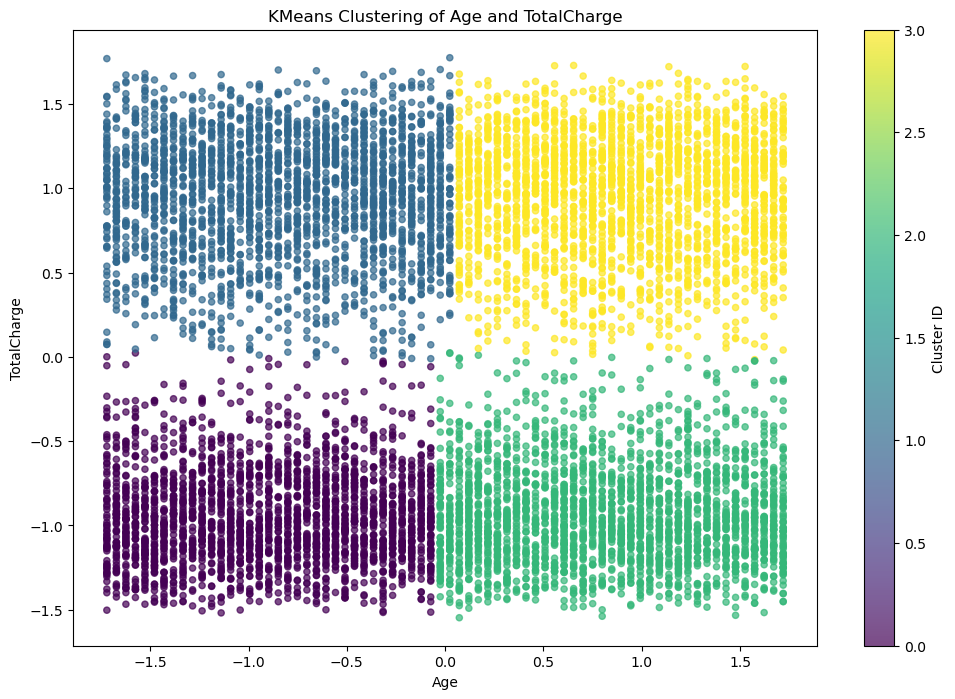

In [15]:
# Plot individual clusters
# Plot Age vs TotalCharge with clusters
plt.figure(figsize=(12, 8))
plt.scatter(cluster_medical_copy['Age'], cluster_medical_copy['TotalCharge'], c=cluster_medical_copy['Clusters'], cmap='viridis', s=20, alpha=0.7)
plt.colorbar(label='Cluster ID')
plt.title('KMeans Clustering of Age and TotalCharge')
plt.xlabel('Age')
plt.ylabel('TotalCharge')
plt.show()

In [16]:
# Average Silhouette Score for all Clusters
silhouette_avg = silhouette_score(cluster_medical_copy, km.labels_)
print(f"Average Silhouette Score: {silhouette_avg.round(2)}")

Average Silhouette Score: 0.66
